In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets 
from ipywidgets import interactive

### 力学の問題
斜方投射の軌跡を描く。高さと角度を動的に変化させる。

In [2]:
def ballthrow(h, deg):
    x = 0
    y = h 
    v = 1
    g = 9.8
    theta = np.radians(deg)
    vx = v*np.cos(theta)
    vy = v*np.sin(theta)
    t = 0
    dt = 0.01
    T = [t]
    X = [x]
    Y = [y]
    while y >= 0:
        t += dt 
        vx += 0
        vy += -g*dt 
        x += vx*dt
        y += vy*dt
        T.append(t)
        X.append(x)
        Y.append(y)
    plt.scatter(X, Y)
    plt.ylim(0, 3)
    plt.xlim(0, 1)
    plt.show()
#ballthrow(1.8, 45)
interactive(ballthrow, 
            h = widgets.IntSlider(min=0, max=3, step=1, value=2), 
            deg = widgets.IntSlider(min=0, max=90,step=5,value=45))


interactive(children=(IntSlider(value=2, description='h', max=3), IntSlider(value=45, description='deg', max=9…

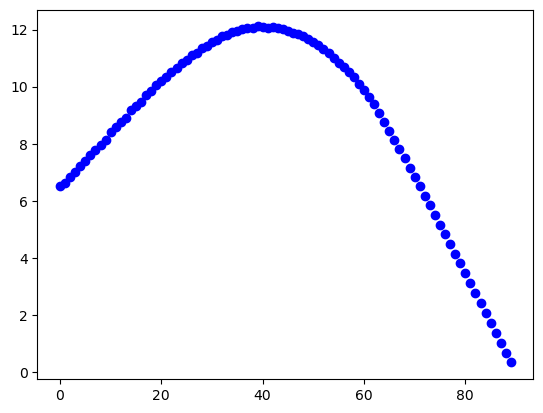

In [3]:
# ライブラリsolve_ivpで初期値問題を解く
from scipy.integrate import solve_ivp
import numpy as np
from numpy import radians, sin, cos, tan, sqrt
import matplotlib.pyplot as plt

h = 2.0
g = 9.8

def deriv(t, z):
    vx, vy, x, y = z
    return [0, -g, vx, vy]

def ground(t, z):
    return z[3]+0.1

ground.terminal = True

def solve(deg, v0=1):
    t1 = 2
    tspan = [0, t1]
    teval = np.linspace(0, t1, 200)
    theta = radians(deg)
    y0 = [v0*cos(theta), v0*sin(theta), 0, h]
    sol = solve_ivp(deriv, tspan, y0, 'RK45',teval, events=ground) 
    #plt.plot(sol.t, sol.y[3])
    #print(deg, sol.y[2][-1])
    plt.scatter(deg, sol.y[2][-1],c='b')

# 2次方程式の解の公式で落下地点のx座標を求める。
def solve2(deg, v0=1):
    theta = radians(deg)
    a = g/(2*v0**2*cos(theta)**2)
    b = -tan(theta)
    c = -h 
    det = b**2-4*a*c
    x = (-b+sqrt(det))/2/a
    #print(deg, x)
    plt.scatter(deg, x, c='b')

for d in range(0, 90):
    solve(d, 10)